In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.special import boxcox1p
from __future__ import print_function
from sklearn import preprocessing
print(plt.style.available)
mpl.style.use(['ggplot']) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
rc = pd.read_excel(
'/Users/scarlettattensil/Downloads/RCCL_DAandAI_NewHireTest[94]/satisfaction.xlsx',
sheet_name = "satisfaction_v2"
)

In [8]:
rc.describe(include = 'all')

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,NaN,2,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,neutral or dissatisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,73452,65899,106100,NaN,89693,62160,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,64940.500000,NaN,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,...,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,NaN,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,...,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,NaN,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,NaN,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,NaN,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,NaN,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


<Axes: xlabel='satisfaction_v2', ylabel='count'>

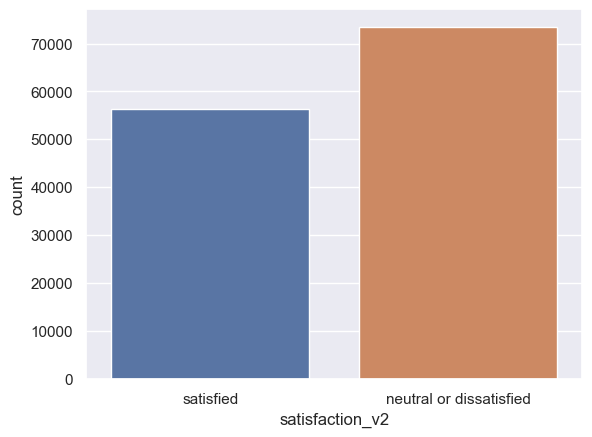

In [9]:
sns.set(font_scale=1)
sns.countplot(data=rc,x="satisfaction_v2")

In [10]:
features = list(np.delete(rc.columns, [0,1,2,3,4,5,6,7,22,23]))

In [11]:
features

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [12]:
mdf = df = pd.melt(rc,id_vars=['satisfaction_v2'],value_vars=features,
             var_name='feature', value_name='value')

In [13]:
mdf

,satisfaction_v2,feature,value
0,satisfied,Inflight wifi service,0
1,satisfied,Inflight wifi service,0
2,satisfied,Inflight wifi service,0
3,satisfied,Inflight wifi service,0
4,satisfied,Inflight wifi service,0
...,...,...,...
1818315,satisfied,Cleanliness,4
1818316,satisfied,Cleanliness,5
1818317,satisfied,Cleanliness,2
1818318,satisfied,Cleanliness,5


[Text(0, 0, 'Inflight wifi service'),
 Text(1, 0, 'Departure/Arrival time convenient'),
 Text(2, 0, 'Ease of Online booking'),
 Text(3, 0, 'Gate location'),
 Text(4, 0, 'Food and drink'),
 Text(5, 0, 'Online boarding'),
 Text(6, 0, 'Seat comfort'),
 Text(7, 0, 'Inflight entertainment'),
 Text(8, 0, 'On-board service'),
 Text(9, 0, 'Leg room service'),
 Text(10, 0, 'Baggage handling'),
 Text(11, 0, 'Checkin service'),
 Text(12, 0, 'Inflight service'),
 Text(13, 0, 'Cleanliness')]

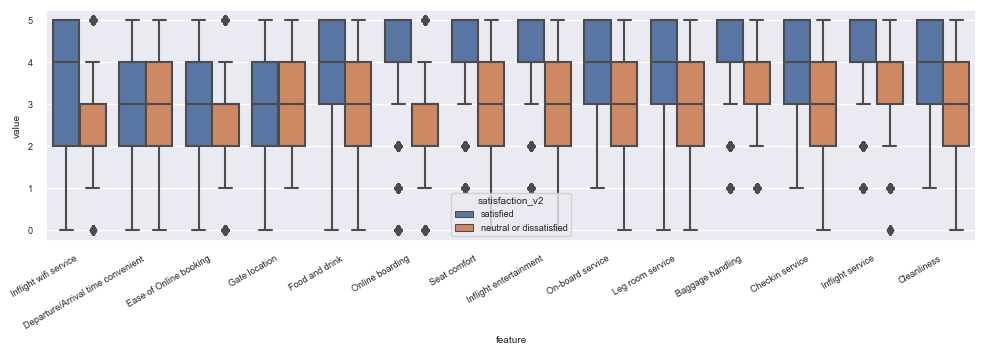

In [14]:
plt.figure(figsize=(12,3)) 
sns.set(font_scale=.6)
ax = sns.boxplot(x="feature", y="value", hue="satisfaction_v2", data=mdf)  
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [15]:
variables = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

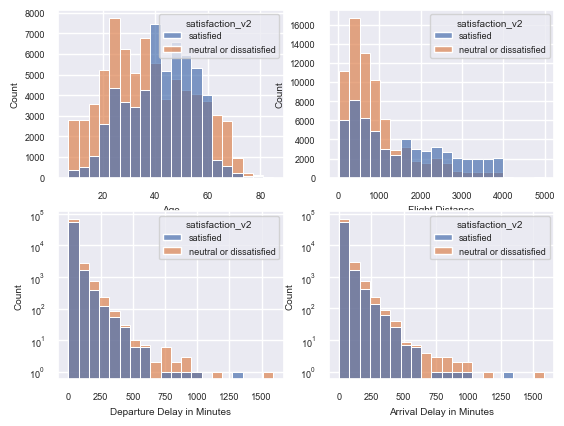

In [16]:
sns.set(font_scale=.6)
fig, axs = plt.subplots(nrows=2, ncols=2)
i = j = 0
for variable in variables:
    g = sns.histplot(data = rc
            ,x = variable
            ,alpha = .7
            ,bins = 20
            ,hue = 'satisfaction_v2'
            ,ax=axs[i][j])
    j += 1
    if i>0:
        g.set(yscale="log")
    if j>1:
        i += 1; j = 0

In [17]:
rc['Departure Delay in Minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [18]:
xt, lmbda = stats.yeojohnson(rc['Departure Delay in Minutes'])

<Axes: ylabel='Count'>

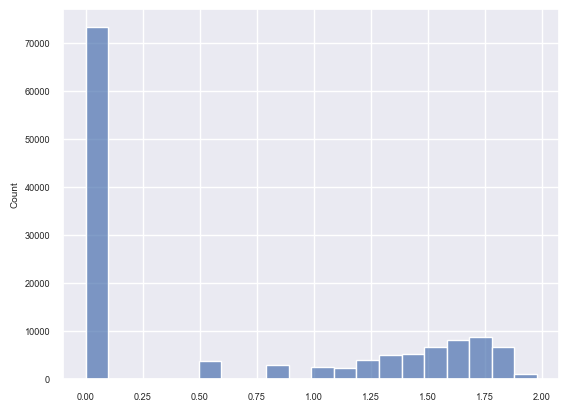

In [22]:
sns.histplot(data = xt
            ,alpha = .7
            ,bins = 20)

In [12]:
features_cat = ['Gender','Customer Type','Type of Travel','Class']

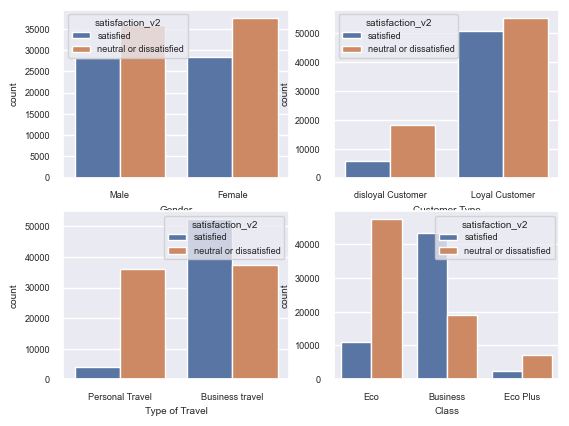

In [37]:
sns.set(font_scale=.6)
fig, axs = plt.subplots(nrows=2, ncols=2)
i = j = 0
for feature in features_cat:
    g = sns.countplot(data=rc, x=feature, hue="satisfaction_v2", ax=axs[i][j])
    j += 1
    if j>1:
        i += 1; j = 0

In [20]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
features_dummy = pd.get_dummies(rc[features_cat])
features_dummy = features_dummy.drop(features_dummy.columns[[0,3,5,6]],axis = 1)

In [17]:
#all features for model
model_features = pd.concat(
    [rc[features],rc[variables],features_dummy],
    axis=1
)

In [88]:
model_features.isna().sum(axis = 0)

Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Age                                    0
Flight Distance                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Gender_Male                            0
Customer Type_Loyal Customer           0
Type of Travel_Business travel         0
Class_Eco                              0
Class_Eco Plus                         0
dtype: int64

In [18]:
X = model_features[model_features["Arrival Delay in Minutes"].notnull()]
y = rc.satisfaction_v2[model_features["Arrival Delay in Minutes"].notnull()]

In [27]:
type(X)

pandas.core.frame.DataFrame

In [37]:
scaler = preprocessing.MinMaxScaler()
normalized_arr  = scaler.fit_transform(X)
print(normalized_arr)

[[0.  0.4 0.  ... 0.  1.  0. ]
 [0.  0.4 0.2 ... 0.  1.  0. ]
 [0.  0.6 0.  ... 0.  1.  0. ]
 ...
 [0.2 0.2 0.2 ... 1.  0.  0. ]
 [0.2 0.2 0.2 ... 1.  0.  0. ]
 [0.2 0.2 0.6 ... 1.  0.  0. ]]


In [38]:
pd.DataFrame(normalized_arr).describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.545709,0.611470,0.551357,0.595382,0.640937,0.650544,0.688318,0.671613,0.676641,0.670216,...,0.657244,0.415753,0.234089,0.009198,0.009527,0.492590,0.816862,0.690764,0.448825,0.072440
std,0.265847,0.305357,0.280332,0.255701,0.265981,0.270130,0.263834,0.266830,0.257406,0.263226,...,0.262725,0.193815,0.201446,0.023827,0.024284,0.499947,0.386781,0.462180,0.497376,0.259216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.400000,0.256410,0.077342,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,...,0.600000,0.423077,0.164176,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,...,0.800000,0.564103,0.345921,0.007538,0.008207,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [95]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [119]:
clf.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [96]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9448606069966793


In [122]:
y_test

9718      neutral or dissatisfied
85580     neutral or dissatisfied
108838                  satisfied
89646                   satisfied
27209     neutral or dissatisfied
                   ...           
94510                   satisfied
91587                   satisfied
124822                  satisfied
115428                  satisfied
14489     neutral or dissatisfied
Name: satisfaction_v2, Length: 38847, dtype: object

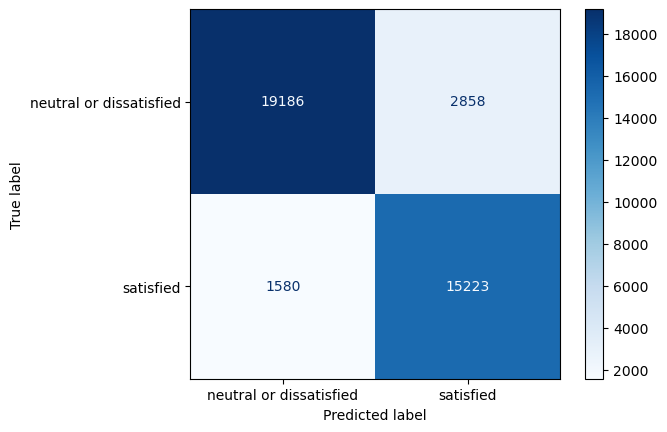

In [132]:
sns.reset_orig()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.show()

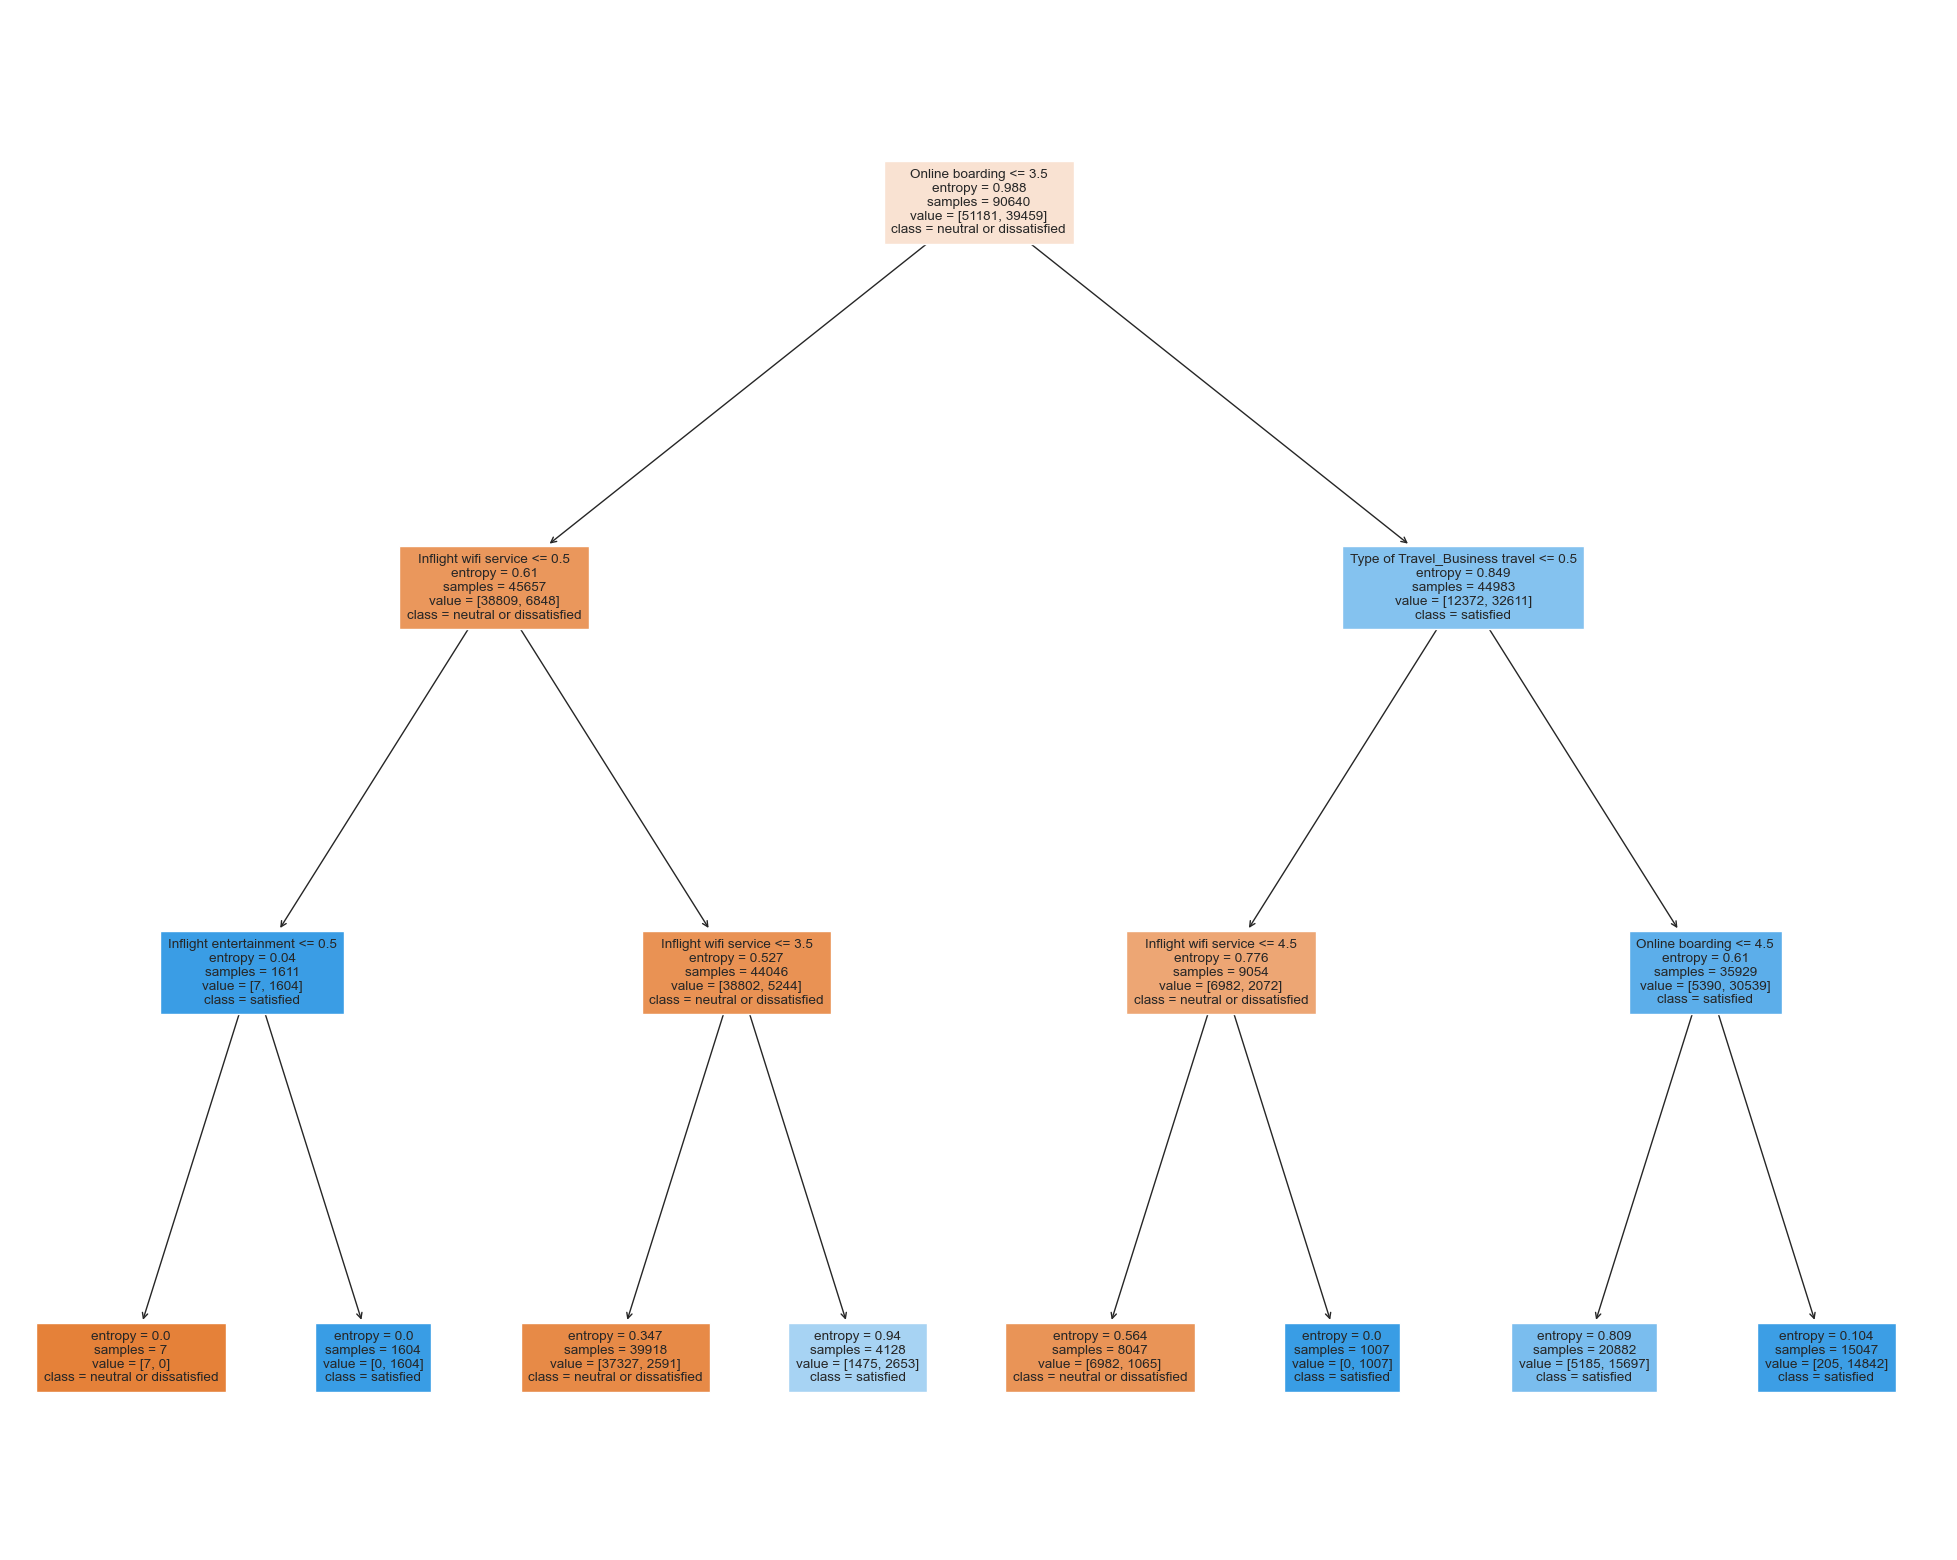

In [121]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns.values.tolist(),  
                   class_names=clf.classes_,
                   filled=True)

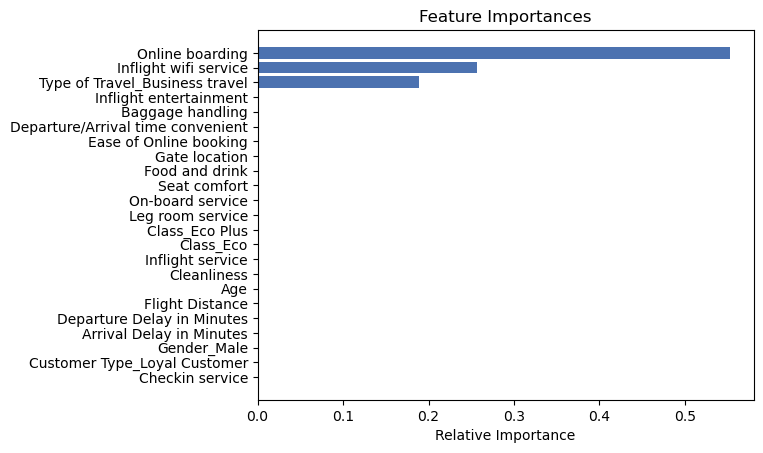

In [134]:
#Feature Importance
importances=clf.feature_importances_

features = X.columns.values.tolist()
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()